In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\processed\processed_data.csv", index_col='Datetime', parse_dates=True)

In [4]:
# Summary Statistics
print("Dataset Overview:")
print(df.describe())


Dataset Overview:
       PM10 (μg/m³)  PM2.5 (μg/m³)    CO (μg/m³)   NO2 (μg/m³)   SO2 (μg/m³)  \
count  22536.000000   22536.000000  22536.000000  22536.000000  22536.000000   
mean      46.823332      33.895749    663.109824     14.488059      6.561084   
std       27.358769      22.924546    471.985090     13.860594      4.791190   
min        0.300000       0.200000     59.000000      0.000000      0.000000   
25%       26.300000      18.200000    325.000000      3.700000      3.500000   
50%       40.400000      27.700000    513.000000     10.600000      5.300000   
75%       62.200000      42.800000    832.000000     21.000000      7.900000   
max      180.200000     170.400000   3204.000000    107.300000     37.500000   

          Temp (°C)  Humidity (%)  Wind_Speed (km/h)  Soil_Moisture (m³/m³)  \
count  22536.000000  22536.000000       22536.000000           22536.000000   
mean      17.919721     74.457112           4.023171               0.293815   
std        5.852187     

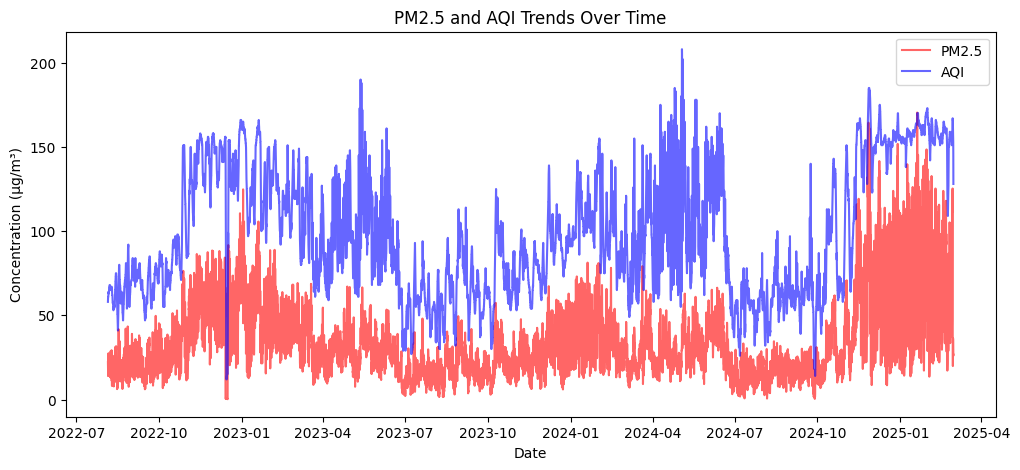

In [5]:

#Time-Series Trends for PM2.5 and AQI
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PM2.5 (μg/m³)'], label='PM2.5', color='red', alpha=0.6)
plt.plot(df.index, df['AQI'], label='AQI', color='blue', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Concentration (μg/m³)")
plt.title("PM2.5 and AQI Trends Over Time")
plt.legend()
plt.savefig("../reports/figures/pm25_aqi_trends.png")
plt.show()

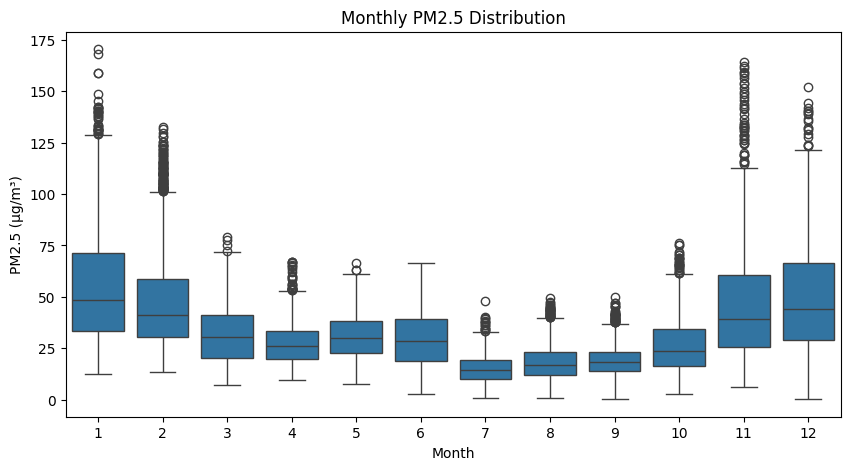

In [6]:
# Seasonality Analysis (Daily, Monthly)
df['Month'] = df.index.month
df['Hour'] = df.index.hour
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='PM2.5 (μg/m³)', data=df)
plt.title("Monthly PM2.5 Distribution")
plt.savefig("../reports/figures/monthly_pm25.png")
plt.show()


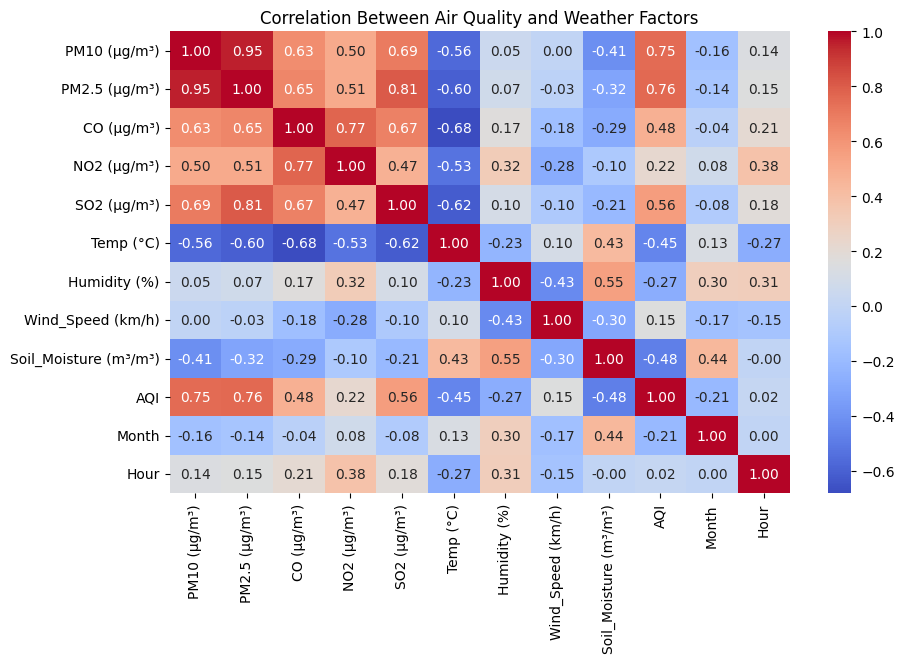

In [15]:
#Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Air Quality and Weather Factors")
plt.savefig("../reports/figures/correlation_heatmap.png")
plt.show()

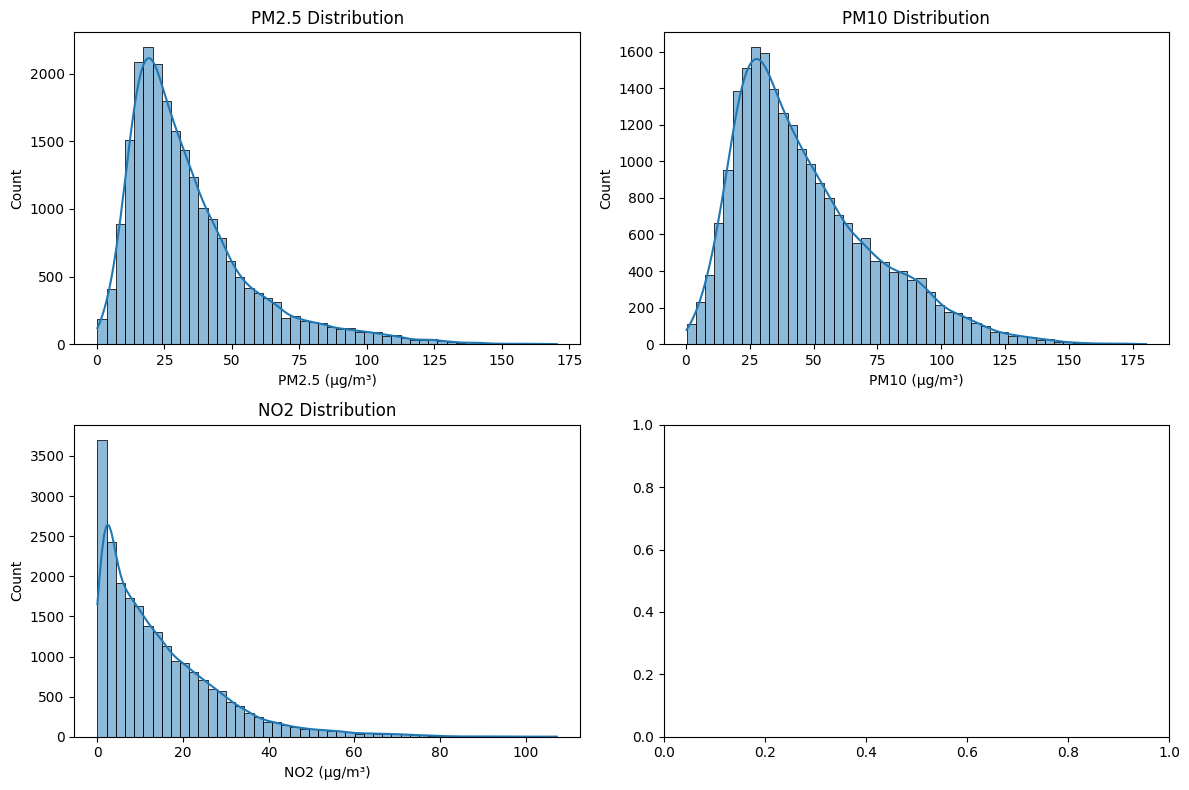

In [14]:
# Distribution of Key Pollutants
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PM2.5 (μg/m³)'], bins=50, kde=True, ax=axes[0,0]).set(title="PM2.5 Distribution")
sns.histplot(df['PM10 (μg/m³)'], bins=50, kde=True, ax=axes[0,1]).set(title="PM10 Distribution")
sns.histplot(df['NO2 (μg/m³)'], bins=50, kde=True, ax=axes[1,0]).set(title="NO2 Distribution")
plt.tight_layout()
plt.savefig("../reports/figures/pollutant_distributions.png")
plt.show()

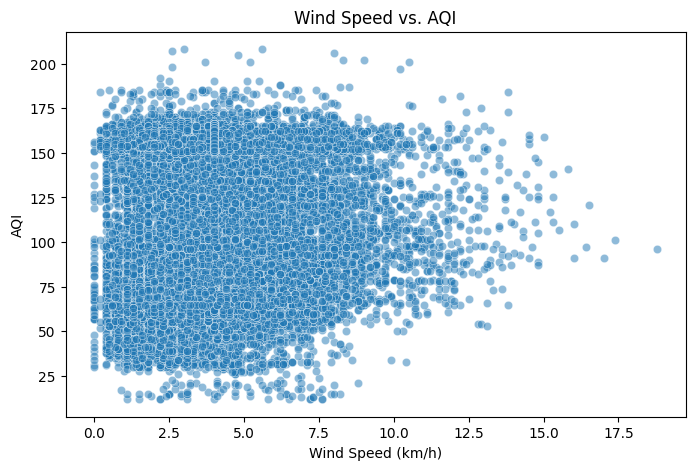

In [13]:

# Step 7: Wind Speed vs. AQI (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Wind_Speed (km/h)'], y=df['AQI'], alpha=0.5)
plt.title("Wind Speed vs. AQI")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("AQI")
plt.savefig("../reports/figures/wind_speed_aqi.png")
plt.show()